# Final Project - Piano Roll Extraction -SRC
- Course: AAI-511-Neural Networks
- Institution: University of San Diego
- Professor: Kahila Mokhtari Jadid
- Group 4 Members: 
    * Lucas Young
    * Titouan Margret
    * Juan Pablo Triana Martinez

This notebook has the intention to follow `data_piano_roll_extraction.ipynb`, but using `src` folder with all functions and classes

In [6]:
import sys
from pathlib import Path
import matplotlib.pyplot as plt
import os

path = Path().resolve().parent
notebook_path = str(path)
print(path)
print(path.exists())
sys.path.insert(1, notebook_path) 

C:\Users\ajedr\OneDrive\Documentos\Masters_Post_Cert_AI_Stanford_USD_2023_2026\Masters_AI_Workspace\src\MSAAI-511-group-4
True


In [7]:
#Import necessary modules
import os
import numpy as np
import kagglehub
from src import DataRetriever, MidiPreprocesser, MidiToNumpy, obtain_piano_rolls, PianoRollsDiscreteEqualizer

### Donwload data

In [8]:
# Obtain current path and data folder path
curr_path = Path.cwd()
download_path = curr_path.parent / "data"
data_path = download_path / "final_proj_data"

#Setup download path to specific data fold (GENUIENLY, Why Kaggelhub :) )
os.environ["KAGGLEHUB_CACHE"] = download_path.__str__()

if download_path.exists():
    print(f"{download_path}: Already exists, no need to create a new one")
else:
    download_path.mkdir(parents=True, exist_ok=True)

if data_path.exists():
    print(f"{data_path}: Already exists, no need to create a new one")
else:
    data_path.mkdir(parents=True, exist_ok=True)

# Download latest version
# path = kagglehub.dataset_download("blanderbuss/midi-classic-music")
# print("Path to dataset files:", path)

c:\Users\ajedr\OneDrive\Documentos\Masters_Post_Cert_AI_Stanford_USD_2023_2026\Masters_AI_Workspace\src\MSAAI-511-group-4\data: Already exists, no need to create a new one
c:\Users\ajedr\OneDrive\Documentos\Masters_Post_Cert_AI_Stanford_USD_2023_2026\Masters_AI_Workspace\src\MSAAI-511-group-4\data\final_proj_data: Already exists, no need to create a new one


In [9]:
midipreprocesser = MidiPreprocesser(data_path = data_path)
midiobj, labels_composer = midipreprocesser.get_midi_info()

Reading_final_proj_data files...: 0it [00:00, ?it/s]
Reading_Bach files...: 100%|██████████| 136/136 [00:03<00:00, 36.93it/s]
Reading composers..: 2it [00:03,  1.85s/it]

Anhang 14-3.mid cannot be read, is skipped


Reading_Chopin files...: 100%|██████████| 925/925 [00:17<00:00, 54.11it/s]
Reading composers..: 4it [00:40, 12.08s/it]

K281 Piano Sonata n03 3mov.mid cannot be read, is skipped


Reading_Mozart files...: 100%|██████████| 257/257 [00:14<00:00, 18.28it/s]
Reading composers..: 5it [00:54, 10.82s/it]


In [10]:
list_np_arrays, list_composer_names, list_song_names = obtain_piano_rolls(midiobject = midiobj)

Creating Piano roll: (2542)Prelude opus.28, No.16 in B flat minor: 100%|██████████| 1195/1195 [00:00<00:00, 149394.73it/s]
Creating Piano roll: 19 Polish Songs, for Solo Voice and Piano accomplements, No.10: 100%|██████████| 1742/1742 [00:00<00:00, 190431.55it/s]
Creating Piano roll: 19 Polish Songs, for Solo Voice and Piano accomplements, No.11: 100%|██████████| 669/669 [00:00<00:00, 133777.80it/s]
Creating Piano roll: 19 Polish Songs, for Solo Voice and Piano accomplements, No.12: 100%|██████████| 682/682 [00:00<00:00, 52451.87it/s]
Creating Piano roll: 19 Polish Songs, for Solo Voice and Piano accomplements, No.13: 100%|██████████| 1062/1062 [00:00<00:00, 85463.37it/s]
Creating Piano roll: 19 Polish Songs, for Solo Voice and Piano accomplements, No.14: 100%|██████████| 602/602 [00:00<00:00, 44718.25it/s]
Creating Piano roll: 19 Polish Songs, for Solo Voice and Piano accomplements, No.15: 100%|██████████| 1580/1580 [00:00<00:00, 131725.94it/s]
Creating Piano roll: 19 Polish Songs, fo

In [11]:
equalizer = PianoRollsDiscreteEqualizer(piano_rolls = list_np_arrays)
eq_piano_rolls = equalizer.get_equalized()
print(eq_piano_rolls.shape)

Equalizing piano rolls...: 100%|██████████| 1528/1528 [00:00<00:00, 5321.10it/s]


(1528, 128, 1565)


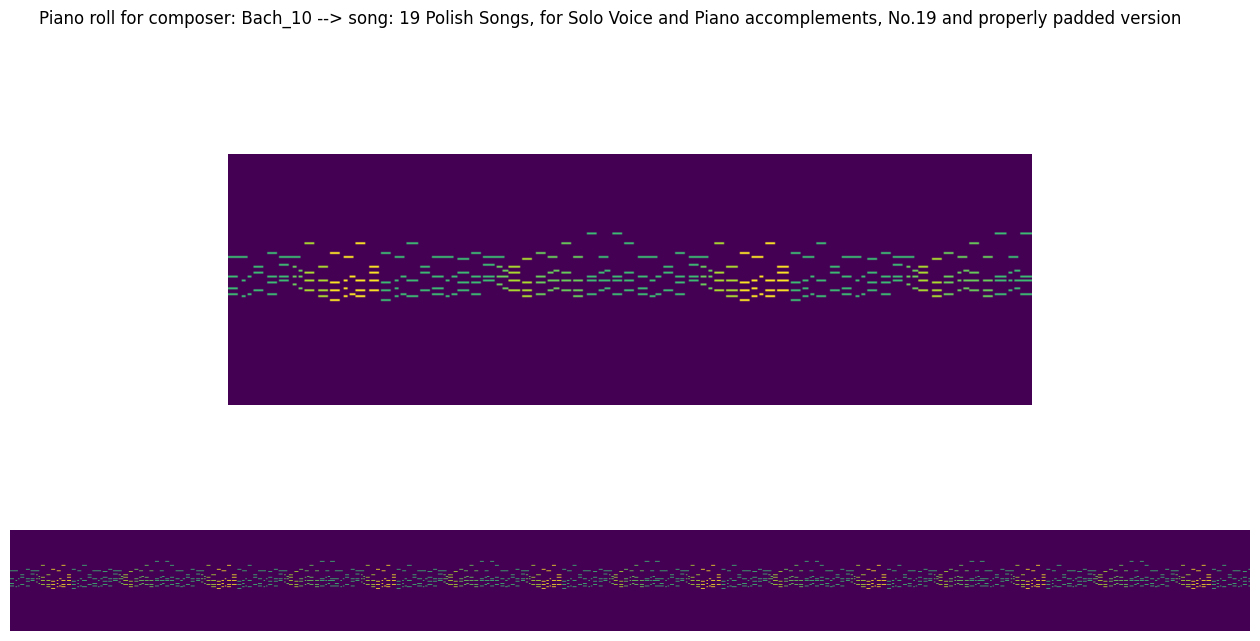

In [12]:
index = 10
fig = plt.figure(figsize=(16, 8))
fig.suptitle(f"Piano roll for composer: {list_composer_names[index]} --> song: {list_song_names[index]} and properly padded version")
fig.subplots_adjust(top = 0.8)
ax1 = fig.add_subplot(2, 1, 1)
ax1.imshow(list_np_arrays[index], label = list_composer_names[index])
ax1.axis("off")

ax2 = fig.add_subplot(2, 1, 2)
ax2.imshow(eq_piano_rolls[index], label = list_composer_names[index])
ax2.axis("off")

plt.show()
